In [16]:
'''
This code is almost all thanks to this guide:
https://www.kaggle.com/kentata/rnn-for-spam-detection/notebook
'''


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('C:\\Users\\Ronald\\Desktop\\Python\\MACHINE_LEARNING\\4_spam_detection\\spam.csv', encoding = 'latin-1')

In [4]:
# Separates texts from whether they are spam or ham
texts = []
labels = []
for i, label in enumerate(data['v1']):
    texts.append(data['v2'][i])
    
    if (label == 'ham'):
        labels.append(0)
    else:
        labels.append(1)

# Change into numpy arrays
texts = np.asarray(texts)
labels = np.asarray(labels)

In [5]:
# Uses the Keras Tokenizer to create features for the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=500)

2786000


In [13]:
# Create a 80-20 split for training and testing
train_samples = int(data.shape[0] * .8)

x_train = data[:train_samples]
y_train = labels[:train_samples]
x_test = data[train_samples:]
y_test = labels[train_samples:]

In [49]:
# Basic Keras RNN size 256
def starter_RNN():
    model = Sequential()
    model.add(Embedding(10000, 32))
    model.add(SimpleRNN(256))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
    
    return model

In [50]:
# Model training
model = starter_RNN()
model.summary()
results = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 256)               73984     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 394,241
Trainable params: 394,241
Non-trainable params: 0
_________________________________________________________________
Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 42s 12ms/step - loss: 0.4315 - acc: 0.8424 - val_loss: 0.4201 - val_acc: 0.8599
Epoch 2/10
3565/3565 [==============================] - 45s 13ms/step - loss: 0.3870 - acc: 0.8687 - val_loss: 0.3829 - val_acc: 0.8599
Epoch 3/10
3565/3565 [==============================] - 42s 12ms/step - loss: 0.3

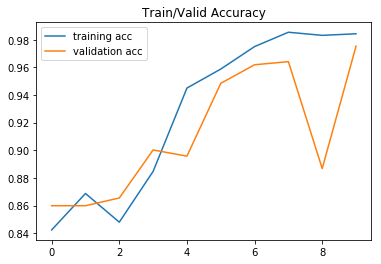

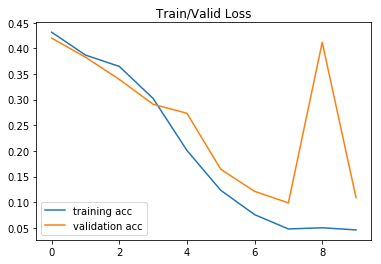

In [52]:
# Grabbing relevant data for graphs
acc = results.history['acc']
val_acc = results.history['val_acc']
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(len(acc))

# Creates Accuracy graph
plt.plot(epochs, acc, label = 'training acc')
plt.plot(epochs, val_acc, label = 'validation acc')
plt.title('Train/Valid Accuracy')
plt.legend()
plt.show()

# Creates Loss graph
plt.plot(epochs, loss, label = 'training acc')
plt.plot(epochs, val_loss, label = 'validation acc')
plt.title('Train/Valid Loss')
plt.legend()
plt.show()

In [53]:
# Generate predictions
pred = model.predict_classes(x_test)
acc = model.evaluate(x_test, y_test)
# Create confusion matrix
m = confusion_matrix(y_test, pred)

# Create a nice dataframe for confusion matrix
df = pd.DataFrame(index = ['True NO', 'True YES'], columns = ['Pred NO', 'Pred YES'])
df.loc['True NO', 'Pred NO'] = m[0][0]
df.loc['True NO', 'Pred YES'] = m[0][1]
df.loc['True YES', 'Pred NO'] = m[1][0]
df.loc['True YES', 'Pred YES'] = m[1][1]
df

1115/1115 [==============================] - 5s 4ms/step


,Pred NO,Pred YES
True NO,966,4
True YES,21,124
